# Multi-Class Text Classification

In [1]:
#Step 1 load data
import pandas as pd
df = pd.read_csv('H:\Machine Learning Module\Data sets\Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/14/2019,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",NC,27519,NaN,Consent not provided,Web,03/14/2019,Closed with explanation,Yes,NaN,3179505.0
1,03/14/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CURO Intermediate Holdings,AZ,85040,NaN,NaN,Web,03/14/2019,Closed with explanation,Yes,NaN,3179861.0
2,03/14/2019,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,NaN,NaN,ALLY FINANCIAL INC.,MS,397XX,NaN,NaN,Web,03/14/2019,In progress,Yes,NaN,3179198.0
3,03/14/2019,Vehicle loan or lease,Loan,Improper use of your report,Reporting company used your report improperly,NaN,NaN,ALLY FINANCIAL INC.,MI,484XX,NaN,NaN,Referral,03/14/2019,In progress,Yes,NaN,3179501.0
4,03/14/2019,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Bonneville Billing and Collections,FL,330XX,NaN,NaN,Web,03/14/2019,Closed with explanation,Yes,NaN,3179976.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141891 entries, 0 to 141890
Data columns (total 18 columns):
Date received                   141891 non-null object
Product                         141888 non-null object
Sub-product                     141888 non-null object
Issue                           141888 non-null object
Sub-issue                       123176 non-null object
Consumer complaint narrative    52529 non-null object
Company public response         69412 non-null object
Company                         141887 non-null object
State                           137487 non-null object
ZIP code                        122062 non-null object
Tags                            18677 non-null object
Consumer consent provided?      97832 non-null object
Submitted via                   141887 non-null object
Date sent to company            141887 non-null object
Company response to consumer    141887 non-null object
Timely response?                141887 non-null object
Consumer disp

** step-2  input putput extraction **

In [3]:
from io import StringIO
col = ['Product','Consumer complaint narrative']
df = df[col]
#non-null values Extraction
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product','Consumer_complaint_narrative']

In [4]:
df.head()

,Product,Consumer_complaint_narrative
5225,Debt collection,I have repeatedly tried to have company verify...
5552,Debt collection,Perfection Collection XXXX XXXX XXXX XXXX XXXX...
5761,Debt collection,ability recovery services had put a collection...
5814,"Credit reporting, credit repair services, or o...",My credit report showed me a hard inquiry made...
6289,Debt collection,XXXX XXXX XXXX is reporting a collection for X...


In [5]:
df['Product'].unique()

array(['Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Student loan',
       'Credit card or prepaid card', 'Mortgage', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service'], dtype=object)

In [6]:
# TO categorize the particular  products
df['category_id'] = df['Product'].factorize()[0]


In [7]:
df.head()

,Product,Consumer_complaint_narrative,category_id
5225,Debt collection,I have repeatedly tried to have company verify...,0
5552,Debt collection,Perfection Collection XXXX XXXX XXXX XXXX XXXX...,0
5761,Debt collection,ability recovery services had put a collection...,0
5814,"Credit reporting, credit repair services, or o...",My credit report showed me a hard inquiry made...,1
6289,Debt collection,XXXX XXXX XXXX is reporting a collection for X...,0


In [8]:
category_id_df = df[['Product','category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Product,category_id
5225,Debt collection,0
5814,"Credit reporting, credit repair services, or o...",1
6385,Checking or savings account,2
7727,Student loan,3
8139,Credit card or prepaid card,4
8539,Mortgage,5
9834,Vehicle loan or lease,6
10593,"Payday loan, title loan, or personal loan",7
11587,"Money transfer, virtual currency, or money ser...",8


In [9]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','Product']].values) # convert into dictionary
id_to_category


{0: 'Debt collection',
 1: 'Credit reporting, credit repair services, or other personal consumer reports',
 2: 'Checking or savings account',
 3: 'Student loan',
 4: 'Credit card or prepaid card',
 5: 'Mortgage',
 6: 'Vehicle loan or lease',
 7: 'Payday loan, title loan, or personal loan',
 8: 'Money transfer, virtual currency, or money service'}

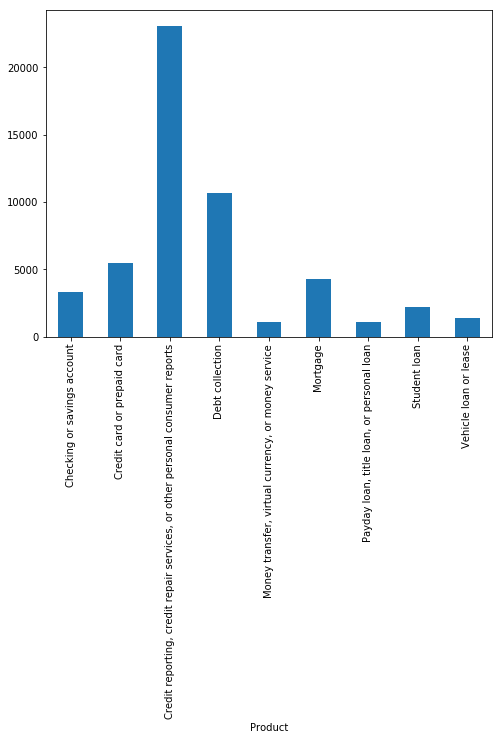

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,min_df=5,norm='l2',encoding='latin-1', ngram_range=(1,2),stop_words='english')

tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)

In [13]:
labels = df.category_id
features.shape
print(features)

  (0, 97876)	0.155527606468
  (0, 119725)	0.113177003352
  (0, 27765)	0.0777731813958
  (0, 123679)	0.125694447167
  (0, 36618)	0.0883646890277
  (0, 100578)	0.105935460478
  (0, 108597)	0.160534252125
  (0, 108054)	0.246870933281
  (0, 101063)	0.127180377779
  (0, 105969)	0.308078632967
  (0, 73012)	0.157678348212
  (0, 91780)	0.194614457392
  (0, 90174)	0.210135516308
  (0, 90580)	0.109480751559
  (0, 97929)	0.266961949353
  (0, 119756)	0.301238436501
  (0, 28531)	0.272811520474
  (0, 123708)	0.212300789238
  (0, 37157)	0.239310792417
  (0, 100814)	0.314841825721
  (0, 73060)	0.280902528204
  (0, 90182)	0.297703582147
  (1, 27765)	0.0437000535358
  (1, 36618)	0.0496513267412
  (1, 86093)	0.273645693802
  :	:
  (52528, 23630)	0.0982656372477
  (52528, 18006)	0.154989351514
  (52528, 127973)	0.0777007807821
  (52528, 43020)	0.289536037538
  (52528, 128711)	0.0982656372477
  (52528, 32690)	0.104283370188
  (52528, 46205)	0.095693415175
  (52528, 117705)	0.0878344719023
  (52528, 73041)	

** feature selection method **
* chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.



In [14]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product,category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features,labels == category_id)
    indices = np.argsort(features_chi2[0])
    features_names = np.array(tfidf.get_feature_names())[indices]
    #unigrams - 'This', 'is', 'a' ,'multitext' ,'classification'   #It takes 1 space
    #bigrams -  'This is' ,'a multitext', 'classification'        #It takes 2 spaces
    unigrams = [v for v in features_names if len(v.split(' ')) == 1]
    bigrams = [v for v in features_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print(" . Most corelated unigrams:\n. {}".format('\n.'.join(unigrams[-N:])))
    print(" . Most corelated bigrams:\n. {}".format('\n.'.join(bigrams[-N:])))
    

# 'Checking or savings account':
 . Most corelated unigrams:
. overdraft
.deposit
 . Most corelated bigrams:
. savings account
.checking account
# 'Credit card or prepaid card':
 . Most corelated unigrams:
. express
.card
 . Most corelated bigrams:
. american express
.credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
 . Most corelated unigrams:
. experian
.report
 . Most corelated bigrams:
. mistakes appear
.credit report
# 'Debt collection':
 . Most corelated unigrams:
. collection
.debt
 . Most corelated bigrams:
. collection agency
.collect debt
# 'Money transfer, virtual currency, or money service':
 . Most corelated unigrams:
. western
.paypal
 . Most corelated bigrams:
. paypal account
.western union
# 'Mortgage':
 . Most corelated unigrams:
. modification
.mortgage
 . Most corelated bigrams:
. mortgage company
.loan modification
# 'Payday loan, title loan, or personal loan':
 . Most corelated unigrams:
. borrowed
.payday
 . Most corela

# Naive Bayes -MultinomialNB

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [16]:
X_train,X_test,y_train,y_test = train_test_split(df['Consumer_complaint_narrative'],df['Product'],random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
print(clf.predict(count_vect.transform(['ability recovery services had put a collection'])))

['Debt collection']


# apply logistic reg , linear reg ,random forest

# Linear SVC

In [18]:
from sklearn.svm import LinearSVC #support vector classifier
model = LinearSVC()
X_train,X_test,y_train,y_test,indices_train,indices_test = train_test_split(features,labels,df.index,test_size=0.33,random_state=0)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
confidence = model.score(X_test,y_test)
print(confidence)

0.863397750216


In [19]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[2907,  371,   29,   29,   60,   45,   32,   15,    8],
       [ 279, 7115,   15,   26,   97,   28,   32,    5,    4],
       [  17,   24,  922,    0,   79,    6,    2,    2,   29],
       [  43,   68,    1,  589,    6,    9,    1,    7,    0],
       [  74,  199,   62,    4, 1482,    9,    5,    2,   10],
       [  25,   53,   11,   12,   14, 1321,    4,    3,    2],
       [  48,  105,    5,    6,   21,   17,  256,    5,    1],
       [  75,   30,   12,   12,   18,   14,    6,  157,    4],
       [  11,   11,   83,    1,   22,    3,    0,    0,  218]], dtype=int64)

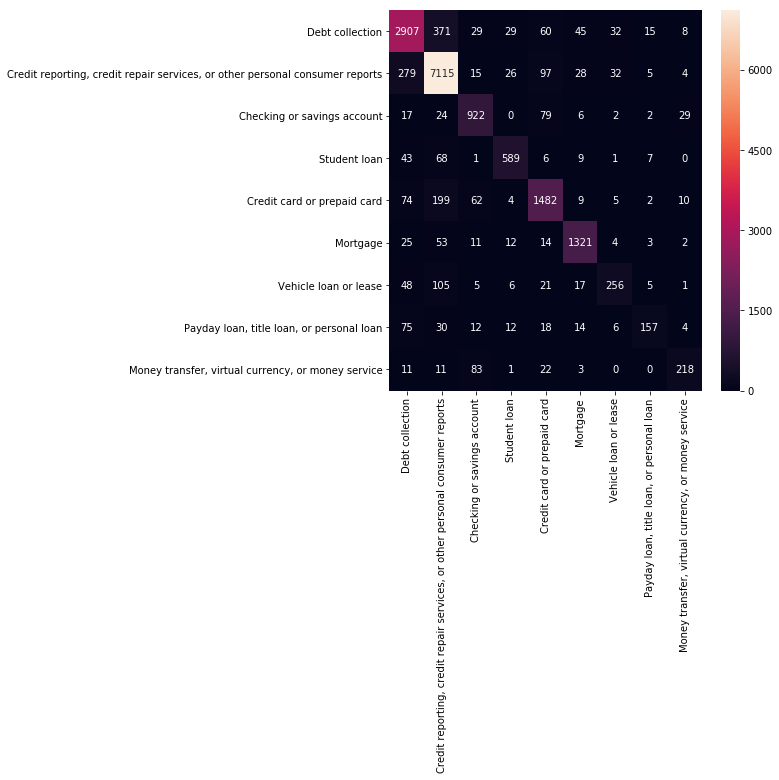

In [20]:
import seaborn as sns
fig ,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=category_id_df.Product.values,yticklabels=category_id_df.Product.values)
plt.show()

# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test,indices_train,indices_test = train_test_split(features,labels,df.index,test_size=0.33,random_state=0)


In [22]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
confidence = logReg.score(X_test,y_test)
print(confidence)

0.835881165273


In [23]:
prediction = logReg.predict(X_test)
print(prediction)

[1 1 0 ..., 0 4 1]


In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,prediction)
conf_mat

array([[2791,  526,   25,   23,   54,   49,   16,    6,    6],
       [ 341, 7063,   19,   20,  105,   44,    6,    3,    0],
       [  24,   49,  906,    0,   83,    3,    1,    0,   15],
       [  55,  104,    3,  535,    9,   13,    2,    3,    0],
       [  71,  266,   56,    2, 1439,    2,    4,    0,    7],
       [  34,   84,   13,   10,   17, 1285,    0,    1,    1],
       [  45,  157,   11,    5,   24,   20,  199,    3,    0],
       [  91,   58,   18,    7,   23,   24,    5,  100,    2],
       [  18,   25,  102,    0,   27,    5,    0,    0,  172]], dtype=int64)

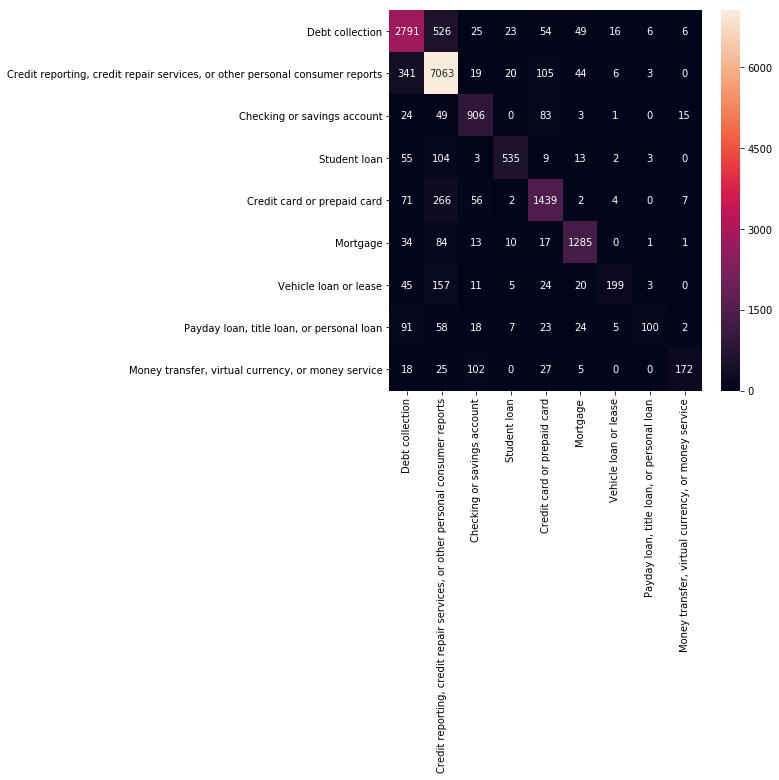

In [25]:
import seaborn as sns
fig ,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=category_id_df.Product.values,yticklabels=category_id_df.Product.values)
plt.show()

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(features,labels)


In [ ]:
prediction = lr.predict(X_test)